In [ ]:
# Чем чаще обучающийся(иеся) дистанционной формы обучения просматривает(ют) теоретический материал до выполнения практического 
# задания, тем выше обучающийся(иеся) получает(ют) оценку по этому заданию

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import pytz
import matplotlib as mpl
import calendar
import statistics

In [4]:
# Открываем "журнал оценок" и преобразвываем дату
d_parser = lambda x: pd.to_datetime(x, unit='s')
file = pd.read_csv('C://Users//37529//Desktop//data since//lms//zaochniki//grade4.csv', quotechar="'", delim_whitespace=True, parse_dates=['timecreated'], 
                   date_parser=d_parser, index_col=0)
file['timecreated'] = file['timecreated'] + pd.Timedelta(hours=3)
# список id всех курсов дистанционного обучения
dist_courses = [4,5,7,8,9,10,11,12,13,14,15,17,18,21,22,23,24,25,26,27,28,29,30,31,686,195,196,197,653,5061,4092,4093,4094,
          35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,5192,5193,5459,5465,5483,5489,4090,4091,
          59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,5171,5172,5204,5455,5456,5458,5184,4089,
          83,84,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,104,105,106,4278,4277,5200,5201,5202,5203,5194,4095,
          107,108,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,4960,172,5195,5196,5197,5198,5199,
          127,128,130,131,132,133,134,135,136,137,138,139,140,141,142,146,147,148,149,150,151,33,5179,5180,5181,5182,5183,
          152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,5060,34,5174,5175,5176,5177,5178,
          173,175,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,5185,5186,5187,5188,5189,5190,5191,4088,
          198,199,200,201,202,203,204,205,206,207,208,209,210,211,213,216,217,220,221,222,223,397,5166,5167,5168,5169,5170,
          224,225,227,228,229,230,231,232,234,235,237,238,239,240,241,242,243,244,245,246,4070,362,5115,5163,5164,5165,
          247,248,250,251,252,253,254,255,256,257,258,259,260,261,263,264,265,266,267,268,683,398,5085,5086,5113,5114,
          269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,400,5484,5070,5071,5077,5084,
          289,290,291,292,293,294,295,296,297,298,300,301,302,303,304,305,306,307,308,309,310,4069,4871,4872,4873,4882,
          311,312,313,314,315,316,317,318,319,320,321,322,323,324,330,331,332,333,334,335,336,337,4867,4868,4869,4870,4276,
          338,339,340,341,342,343,344,345,346,347,348,349,350,351,353,354,355,356,358,359,360,361,4501,4595,4608,4820,4866,
          363,364,365,366,367,368,369,370,372,373,374,375,376,377,378,379,380,381,382,383,395,396,4279,4280,4473,4474,4480,
          401,402,403,404,405,406,409,410,413,414,416,421,422,423,453,471,513,524,571,610,636,649,4100,4101,4102,4103,4104,
          690,691,692,693,694,695,696,697,698,699,2250,2260,2263,2934,3034,3144,3238,3785,3951,4065,4096,4097,4098,4099]
# Делаем выборку только для курсов дистанционного обучения по колонке "courseid"
file1 = file[file["courseid"].isin(dist_courses)]
# Делаем выборку по оценкам от (0 до 10). Оценки, которым принадлежат от (10-100) не будут участвовать в анализе.
mark = [0, 1,2,3,4,5,6,7,8,9,10]
file2 = file1[file1["finalgrade"].isin(mark)]
# Вывожу на экран важные для меня колонки "timecreated", "items", "userid", "courseid", "finalgrade"
grade=file2[["timecreated", "items", "userid", "courseid", "finalgrade"]]
grade

,timecreated,items,userid,courseid,finalgrade
id,,,,,
463,2022-03-10 18:26:24,quiz,144,137,9
464,2022-03-11 14:21:39,quiz,144,137,8
465,2022-03-13 11:36:10,quiz,144,137,8
466,2022-03-13 11:59:03,quiz,144,137,9
472,2022-03-13 12:10:53,quiz,144,137,9
...,...,...,...,...,...
473,2022-03-04 19:30:36,quiz,24071,137,10
474,2022-03-04 19:54:02,quiz,24071,137,9
10839,2022-03-04 20:24:32,quiz,24071,137,10


In [5]:
d_parser = lambda x: pd.to_datetime(x, unit='s')
# загрузка всего "журнала событий" и соединения его в один DataFrame
file1 = pd.read_csv('C://Users//37529//Desktop//data since//data//logs-2021_2022_1.csv', parse_dates=['timecreated'], date_parser=d_parser)
file2 = pd.read_csv('C://Users//37529//Desktop//data since//data//logs-2021_2022_2.csv', parse_dates=['timecreated'], date_parser=d_parser)
file3 = pd.read_csv('C://Users//37529//Desktop//data since//data//logs-2021_2022_3.csv', parse_dates=['timecreated'], date_parser=d_parser)
file4 = pd.read_csv('C://Users//37529//Desktop//data since//data//logs-2021_2022_4.csv', parse_dates=['timecreated'], date_parser=d_parser)
file5 = pd.read_csv('C://Users//37529//Desktop//data since//data//logs-2021_2022_5.csv', parse_dates=['timecreated'], date_parser=d_parser)
file6 = pd.read_csv('C://Users//37529//Desktop//data since//data//logs-2021_2022_6.csv', parse_dates=['timecreated'], date_parser=d_parser)
file7 = pd.read_csv('C://Users//37529//Desktop//data since//data//logs-2021_2022_7.csv', parse_dates=['timecreated'], date_parser=d_parser)
file8 = pd.read_csv('C://Users//37529//Desktop//data since//data//logs-2021_2022_8.csv', parse_dates=['timecreated'], date_parser=d_parser)
file9 = pd.read_csv('C://Users//37529//Desktop//data since//data//logs-2021_2022_9.csv', parse_dates=['timecreated'], date_parser=d_parser)
file10 = pd.read_csv('C://Users//37529//Desktop//data since//data//logs-2021_2022_10.csv', parse_dates=['timecreated'], date_parser=d_parser)
file11 = pd.read_csv('C://Users//37529//Desktop//data since//data//logs-2021_2022_11.csv', parse_dates=['timecreated'], date_parser=d_parser)
file = pd.concat([file1.assign(file1=1), file2.assign(file2=2), file3.assign(file3=3),
                file4.assign(file4=4), file5.assign(file5=5), file6.assign(file6=6), 
                file7.assign(file7=7),file8.assign(file8=8), file9.assign(file9=9),
                file10.assign(file10=10), file11.assign(file11=11)])
# Преобразование времени
file['timecreated'] = file['timecreated'] + pd.Timedelta(hours=3)
# Делаю выборку из всех форм обучения по форме ДО.
# В 'dist_courses' находятся все id курсов дистанционной формы обучения. 
file_All = file[file["courseid"].isin(dist_courses)]
# Выбираем необходимые нам столбцы 
file_All_1=file_All[[ "action", "objecttable", "userid", "courseid", "timecreated"]]
# Делаю выборку по ['viewed', 'reviewed', 'shown']. 
action = ['viewed', 'reviewed', 'shown']
data2 = file_All_1[file_All_1["action"].isin(action)]
# выбираем теоритические элементы
elements = ['lesson', 'book', 'lesson_pages', 'resourse', 'page', 'folder']
data4 = data2[data2["objecttable"].isin(elements)]
# оставляем нужные нам столбцы
teoria=data2[["timecreated", "action", "userid", "courseid"]]
# Столбец "action" меняю на название "items" для дальнейшего соединения двух таблиц
teoria.rename(columns={'action':'items'}, inplace=True)
teoria

C:\Users\37529\AppData\Local\Temp\ipykernel_1068\3830611983.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teoria.rename(columns={'action':'items'}, inplace=True)


,timecreated,items,userid,courseid
2,2021-09-01 00:00:04,viewed,1909,126
3,2021-09-01 00:00:10,viewed,1909,126
4,2021-09-01 00:00:11,viewed,7876,59
6,2021-09-01 00:00:15,viewed,7876,59
7,2021-09-01 00:00:15,viewed,7876,59
...,...,...,...,...
1716708,2022-06-30 23:28:44,viewed,14280,271
1716709,2022-06-30 23:28:48,viewed,14280,271
1716710,2022-06-30 23:28:52,viewed,14280,271
1716832,2022-06-30 23:47:07,viewed,15879,4882


In [6]:
# Соединяем таблицу с оценка (grade) с таблицой с просмотром теории (teoria), выбираем определенные столбцы
file100 = pd.concat([grade.assign(grade=0), teoria.assign(teoria=0)])
file101=file100[["timecreated", "items", "userid", "courseid", "finalgrade"]]
# Сортировка по времени
sorted_df = file101.sort_values(by='timecreated')
sorted_df

,timecreated,items,userid,courseid,finalgrade
2,2021-09-01 00:00:04,viewed,1909,126,NaN
3,2021-09-01 00:00:10,viewed,1909,126,NaN
4,2021-09-01 00:00:11,viewed,7876,59,NaN
9,2021-09-01 00:00:15,viewed,7876,59,NaN
6,2021-09-01 00:00:15,viewed,7876,59,NaN
...,...,...,...,...,...
1716708,2022-06-30 23:28:44,viewed,14280,271,NaN
1716709,2022-06-30 23:28:48,viewed,14280,271,NaN
1716710,2022-06-30 23:28:52,viewed,14280,271,NaN
1716832,2022-06-30 23:47:07,viewed,15879,4882,NaN


In [7]:
# В оценки finalgrade заменяю Nan на 11.
#там где sorted_df['finalgrade']=11- это просмотр теории
sorted_df['finalgrade'] = sorted_df[['finalgrade']].fillna(11)
sorted_df #там где sorted_df['finalgrade']=11- это просмотр теории

,timecreated,items,userid,courseid,finalgrade
2,2021-09-01 00:00:04,viewed,1909,126,11.0
3,2021-09-01 00:00:10,viewed,1909,126,11.0
4,2021-09-01 00:00:11,viewed,7876,59,11.0
9,2021-09-01 00:00:15,viewed,7876,59,11.0
6,2021-09-01 00:00:15,viewed,7876,59,11.0
...,...,...,...,...,...
1716708,2022-06-30 23:28:44,viewed,14280,271,11.0
1716709,2022-06-30 23:28:48,viewed,14280,271,11.0
1716710,2022-06-30 23:28:52,viewed,14280,271,11.0
1716832,2022-06-30 23:47:07,viewed,15879,4882,11.0


In [8]:
# выбираем курсы, в которых есть просмотр теории и оценки
# список id курсов, в которых студенты просматривали теорию и получали оценки 
courses_grade_teor=list(sorted_df['courseid'].unique())
courses_grade_teor

[126,
 59,
 40,
 26,
 28,
 37,
 34,
 169,
 285,
 177,
 124,
 217,
 243,
 147,
 114,
 104,
 120,
 312,
 41,
 80,
 27,
 36,
 284,
 47,
 4,
 213,
 73,
 62,
 319,
 164,
 150,
 123,
 52,
 92,
 71,
 72,
 39,
 280,
 231,
 257,
 133,
 128,
 110,
 115,
 321,
 127,
 152,
 377,
 64,
 4279,
 98,
 202,
 88,
 192,
 82,
 94,
 116,
 119,
 140,
 255,
 77,
 87,
 51,
 91,
 97,
 78,
 157,
 171,
 112,
 134,
 93,
 66,
 117,
 275,
 122,
 136,
 471,
 178,
 142,
 56,
 244,
 270,
 55,
 60,
 29,
 89,
 102,
 131,
 137,
 30,
 42,
 57,
 228,
 153,
 160,
 163,
 165,
 168,
 183,
 302,
 356,
 205,
 107,
 121,
 138,
 216,
 524,
 381,
 184,
 4276,
 158,
 186,
 154,
 151,
 331,
 70,
 277,
 48,
 63,
 69,
 74,
 139,
 106,
 125,
 135,
 251,
 111,
 300,
 181,
 187,
 166,
 245,
 2250,
 49,
 95,
 68,
 12,
 200,
 4474,
 4278,
 61,
 75,
 5,
 132,
 141,
 266,
 50,
 250,
 99,
 148,
 113,
 118,
 130,
 79,
 161,
 410,
 513,
 261,
 238,
 336,
 170,
 155,
 159,
 179,
 4097,
 610,
 296,
 4473,
 653,
 195,
 2263,
 108,
 693,
 649,
 54,


In [9]:
#id всех пользователи, которые просмотривали теории или получали оценки
users_grade_teor=list(sorted_df['userid'].unique())
# id всех студентов дистанционной формы обучения
all_distant_users=[2097,14395,14397,14402,15160,18738,14409,14413,14417,14295,14296,14297,14298,14299,14307,14321,12566,14941,
                   14323,14324,14325,14326,14264,14268,14330,14332,14333,14342,14343,14351,14371,14376,18358,14412,2442,2668,
                   19082,14269,14271,14318,14319,2040,14320,21540,14313,14308,19084,14262,14255,14258,14260,2094,22685,14338,
                   21543,2070,15816,21547,21548,19032,14335,14339,14340,14334,14352,14353,14356,14357,14347,14348,579,590,598,
                   14349,14350,14369,14370,18993,6425,14372,14374,14359,14360,14362,14363,14365,14366,1670,14377,473,477,480,
                   14378,17592,18517,14386,14387,14388,14405,14398,14399,14400,14401,14389,14393,14396,15159,14406,21836,839,
                   15362,14411,18324,715,15270,3917,3712,21839,5573,7527,23018,2663,18255,2430,16971,16634,15900,24695,609,567,
                   24686,24687,24688,24689,24690,24691,24692,24693,24694,24703,24704,24705,24706,24707,24708,24709,9209,591,
                   24696,24697,24698,24699,24700,24701,24702,24726,24727,24728,24729,24730,24731,24725,24734,24735,209,7096,
                   24736,24737,24738,24739,24742,24743,24744,24745,24746,24747,24748,24749,24740,24741,24750,24758,4141,7081,
                   24759,24760,24761,24762,24763,24764,24765,24751,24681,24752,24753,24754,24755,24756,24757,24774,9285,2328,
                   24775,24776,24777,24778,24779,24766,24767,24768,24769,24770,24771,24772,24773,24787,24788,24789,14429,17543,
                   24790,24791,24792,24793,24780,24781,24782,24784,24785,24786,24808,24800,24801,24802,24803,24804,23099,2999,
                   24805,24806,24807,24794,24795,24796,24797,24798,24799,25553,25554,25562,25563,14314,27046,27048,3914,606,605,
                   27049,27050,27051,27063,14256,27273,21991,21992,21993,21985,21987,21989,22018,22019,22021,22031,479,9224,
                   22023,22024,22026,22028,22040,22041,22043,22033,21842,22037,22052,22058,22063,2047,21551,22078,23544,602,
                   22079,3920,22087,22088,22091,19140,22092,22093,22080,14654,22081,22082,22083,22085,22103,22104,2014,17539,
                   22094,22095,22096,22099,22100,20130,2048,711,21544,27512,22177,22688,16431,16367,6224,16347,21542,470,311,
                   8237,7573,16021,8579,22690,17652,2030,22884,601,7243,16945,9741,17011,14416,4139,14410,14331,2857,12576,
                   15294,694,15540,15280,2884,2085,17624,6958,7092,19023,7121,2079,4443,6326,3657,19046,2088,2092,2086,265,266,
                   1838,2032,1791,2220,4145,2050,2044,2121,2125,9278,2944,7133,836,14421,2115,14726,15185,7088,2046,576,5486,
                   18820,8578,5725,3487,2237,5513,2725,704,2560,15419,453,21829,2231,718,2099,2126,13322,21997,22002,21994,40,
                   21995,21553,2045,2093,22010,19146,19137,21820,22014,22015,22017,22072,22073,22074,22075,22076,22064,22065,
                   22066,22068,22069,22070,22071,22062,20923,21969,22005,22007,6699,283,6666,6693,6587,8628,6691,2711,815,331,
                   2379,8899,27037,27038,27039,27040,27041,27042,27036,27033,27034,27035,21535,27514,2042,18991,15169,4418,
                   2089,2038,3181,17625,2571,6077,2203,2902,4295,687,2142,22027,22029,22030,22032,22035,22038,22039,22044,5694,
                   22046,24718,24719,24720,24721,24722,24723,24724,24710,24711,24712,24713,24714,24715,24716,24717,1839,326,
                   14427,2775,263,476,3744,3705,4863,474,3018,2524,3818,2998,17371,15376,17349,14291,17392,6555,14293,17350,
                   14280,21832,17346,554,8669,3184,23064,6533,18503,14974,8084,21827,558,8097,8096,14652,2743,17347,277,14651,
                   182,279,291,2416,2730,3935,19002,22686,14250,18829,2029,2084,9573,14428,7593,21534,2860,16356,16359,16354,
                   4596,19048,667,18787,17574,14252,2456,18124,117,396,401,406,408,409,412,2801,3785,15336,18824,2098,5665,
                   5696,2146,9080,5674,23087,23335,23336,23058,22926,22911,22947,23040,22943,22983,22928,22894,23541,23148,
                   22980,23330,22918,23546,23039,23332,23333,23331,6369,3499,14384,14631,3564,6317,2023,19063,2067,6445,2031,
                   21828,2285,3994,23506,23497,23485,23337,821,819,817,2650,9170,4262,3929,575,822,7852,2348,7841,603,14385,
                   4906,22055,23338,23505,23437,23439,23499,23435,24179,6397,6525,22855,2233,6334,2230,24071,21831,3764,17271,
                   3768,3769,7876,442,446,448,449,452,455,456,459,460,3543,3688,22889,10485,6897,8908,2102,2114,2116,23054]
#Для нашей задачи нам необходимы студенты дистанционной формы обучения, поэтому выбираем из id всех пользователей 
# id учащихся дистанциооной формы и записываем их в список "distan_user_work"
distan_user_work=[]
for i in all_distant_users:
    if i in users_grade_teor:
        distan_user_work.append(i)
print(len(distan_user_work))   
print(distan_user_work)


480
[12566, 14412, 19082, 14269, 14271, 14318, 14319, 2040, 14320, 21540, 14313, 14308, 19084, 14262, 14255, 14258, 14260, 2094, 14338, 21543, 2070, 15816, 21547, 21548, 19032, 14335, 14339, 14340, 14334, 14352, 14353, 14356, 14357, 14347, 14348, 579, 590, 598, 14349, 14350, 14369, 14370, 18993, 6425, 14372, 14374, 14359, 14360, 14362, 14363, 14365, 14366, 1670, 14377, 473, 477, 480, 14378, 17592, 18517, 14386, 14387, 14388, 14405, 14398, 14399, 14400, 14401, 14389, 14393, 14396, 15159, 14406, 21836, 839, 15362, 14411, 18324, 715, 15270, 3917, 3712, 21839, 5573, 7527, 23018, 2663, 18255, 2430, 16971, 16634, 15900, 609, 567, 9209, 591, 209, 7096, 4141, 7081, 9285, 2328, 14429, 17543, 23099, 2999, 3914, 606, 605, 21991, 21992, 21993, 21985, 21987, 21989, 22018, 22019, 22021, 22031, 479, 9224, 22023, 22024, 22026, 22028, 22040, 22041, 22043, 22033, 21842, 22037, 22052, 22058, 22063, 2047, 21551, 22078, 23544, 602, 22079, 3920, 22087, 22088, 22091, 19140, 22092, 22093, 22080, 14654, 22081,

In [24]:
#Что такое аккум - это когда подсчет идет от первого числа и прибавляется послед число к предыдущему.
# Например 70 просмотром - 7 оценка, 40+(110) просмотров - 6 оценка, 20+(130) - 9 оценка и т.д.
#Что такое не аккум - это когда подсчет идет от первого числа и не прибавляется послед число к предыдущему.
# Например 70 просмотром - 7 оценка, 40(40) просмотров - 6 оценка, 20(20) - 9 оценка и т.д.

In [11]:
#Пример кода не аккумулированного подсчета количества просмотров теории для пользователя с id=144
dist_u = [144]
file_ne_akk = sorted_df[sorted_df["userid"].isin(dist_u)]
ne_akk=pd.DataFrame({'osenka': [], 'teoria': []})
teor=0
for i, row in file_ne_akk.iterrows():
    if  row['finalgrade']==11.0:
        teor+=1
    else:
        ne_akk.loc[len(ne_akk.index)]=[row['finalgrade'], teor]
        teor=0
ne_akk

,osenka,teoria
0,9.0,36.0
1,8.0,29.0
2,8.0,34.0
3,9.0,25.0
4,9.0,21.0
5,10.0,35.0
6,9.0,117.0
7,9.0,23.0
8,0.0,74.0


In [12]:
#Посчитать корреляцию 
df= ne_akk['osenka'].corr(ne_akk['teoria'])
df

-0.33491945429201425

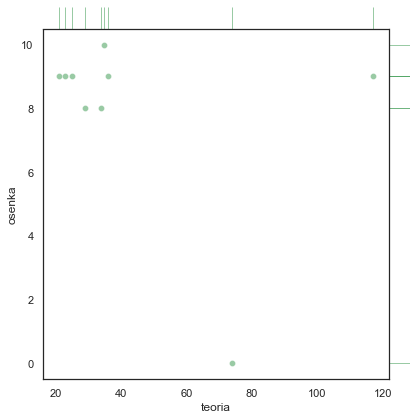

In [29]:
# График оценка от кол-во теории. 
sns.set_theme(style ="white", color_codes =True)

g  = sns.JointGrid(data =ne_akk, x ="teoria", y ="osenka", space=0, ratio=16)
g.plot_joint(sns.scatterplot, sizes=(100,500 ),
             color="g", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="g", alpha= .6)

In [60]:
#Для аккумулированного подсчета. Для пользователя с id=144
dist_u = [144]
file_akk = sorted_df[sorted_df["userid"].isin(dist_u)]
akk=pd.DataFrame({'otsenka': [], 'teoria': []})
teor=0
for i, row in file_akk.iterrows():
    if  row['finalgrade']==11.0:
        teor+=1
    else:
        akk.loc[len(akk.index)]=[row['finalgrade'], teor]

In [61]:
akk

,otsenka,teoria
0,9.0,36.0
1,8.0,65.0
2,8.0,99.0
3,9.0,124.0
4,9.0,145.0
5,10.0,180.0
6,9.0,297.0
7,9.0,320.0
8,0.0,394.0


In [31]:
akk['osenka'].corr(akk['teoria'])


-0.5611374252647418

In [32]:
# #proverka correlation
# dist_c = [14252]
# file_prov_1 = sorted_df[sorted_df["userid"].isin(dist_c)]
# # dist_u = [8653]
# # file_prov_1 = file_prov[file_prov["userid"].isin(dist_u)]
# osenka_proverka=pd.DataFrame({'osenka': [], 'teoria': []})
# teor_prov=0
# for i, row in file_prov_1.iterrows():
#     if  row['finalgrade']==11.0:
#         teor_prov+=1
#     else:
#         osenka_proverka.loc[len(osenka_proverka.index)]=[row['finalgrade'], teor_prov]
#         teor_prov=0

In [13]:
user_ne_podhodiat_1=[]

In [14]:
#Удаление из списка user id студентов, для которых при составлении таблицы "osenka1" закономерности "оценки от просмотров теории" 
#в колонке "теория" все значении были равны 0 или же у которых вовсе отсутствовали оценки. По итогу выполнения этого кода мы получим
# отсортированный список id студентов для дальнейшего нахождения коэффициента корреляции.
p=0 
while p<len(distan_user_work):
    d_u = [distan_user_work[p]]
    file_delite = sorted_df[sorted_df["userid"].isin(d_u)]
    osenka1=pd.DataFrame({'osenka': [], 'teoria': []})
    teor=0
    prov=0
    for index, row in file_delite.iterrows():
        if  row['finalgrade']==11.0:
            teor+=1
        else:
            osenka1.loc[len(osenka1.index)]=[row['finalgrade'], teor]
    for indez, rows in osenka1.iterrows():
        if  rows['teoria']!=0.0:
            continue
        elif rows['teoria']==0.0:
            prov+=1
    if osenka1.shape[0]==prov:
        user_ne_podhodiat_1.append(distan_user_work[p])
        distan_user_work.remove(distan_user_work[p])
    p+=1

In [15]:
len(distan_user_work)

330

In [16]:
# КОРРЕЛЯЦИЯ ДЛЯ ВСЕХ ЮЗЕРОВ 
# Далее переходим непосредственно к нахождении коэффициента корреляции для отсортированного списка id студентов.
# Для этого создаем новый DataFrame под названием "correl" со столбцами "userid" и "correlation". При помощи данного кода 
#заполняеться вышеупомянутый DataFrame следующим образом: в столбец "userid" записывается id студента, а в столбец "correlation" -
#коэффициент корреляции для конкретно студента.
correl=pd.DataFrame({'userid': [], 'correlation': []})
p=0
for p in range(len(distan_user_work)):
    dist_user = [distan_user_work[p]]
    file111 = sorted_df[sorted_df["userid"].isin(dist_user)]   
    akk=pd.DataFrame({'osenka': [], 'teoria': []})
    v=0
    for i, row in file111.iterrows():
        if  row['finalgrade']==11.0:
            v+=1
        else:
            akk.loc[len(akk.index)]=[row['finalgrade'], v]
    cor=np.corrcoef(akk['osenka'], akk['teoria'])[0,1]
    correl.loc[len(correl.index)]=[distan_user_work[p], cor]

C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\37529\anaconda3\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_b

C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\37529\anaconda3\lib\site-packages\numpy\core\_methods.py:

C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\37529\anaconda3\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:

C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\37529\anaconda3\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\37529\anaconda3\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invali

C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\37529\anaconda3\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\37529\anaconda3\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invali

C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\37529\anacond

C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\37529\anaconda3\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:

C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\37529\anaconda3\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\37529\anaconda3\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invali

C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\37529\anaconda3\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\37529\anaconda3\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invali

C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_ba

C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\37529\anaconda3\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\37529\anaconda3\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invali

C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_ba

In [17]:
correl

,userid,correlation
0,14412.0,0.308928
1,14269.0,0.427089
2,14318.0,-0.807562
3,14319.0,0.261950
4,2040.0,-0.192158
...,...,...
325,6897.0,-0.999641
326,2102.0,NaN
327,2114.0,-0.109312
328,2116.0,NaN


In [20]:
correl = correl.dropna(axis='index', how='any', subset=['correlation'])
correl['correlation']= correl['correlation'].abs()
correl['correlation'].unique()
final_corr=correl['correlation'].mean()
final_corr

0.5101143083306403

In [23]:
# медиана
df_user_m=correl.sort_values('correlation')
median_ = statistics.median(df_user_m['correlation'])
median_


0.49551481850544987

In [24]:
# Мода — это значение в наборе данных, которое встречается чаще всего.
mode_ = statistics.multimode(list(correl['correlation']))
mode_

[1.0]

In [25]:
# Дисперсия количественно определяет разброс данных. Численно показывает, как далеко точки данных от среднего значения.
var_ = statistics.variance(correl['correlation'])
var_


0.09848934218214105

In [26]:
# Стандартное отклонение выборки является еще одним показателем разброса данных.
# Он связан с оценкой дисперсией, поскольку стандартное отклонение есть положительным квадратный корень из оценки дисперсии.
# Стандартное отклонение часто более удобно, чем дисперсия, потому что имеет ту же размерность, что и данные.
std_ = statistics.stdev(correl['correlation'])
std_

0.31383011675449674

In [ ]:
# Величина коэффициента корреляции отражает силы связи. В нашем случает коэффициент корреляции отражает влияние между
# количеством просморов студентом теории до практики на его оценку.
# При оценке силы связи коэффициентов корреляции используется шкала Чеддока, благодаря ей становится возможным «перевести» 
# численное (количественное) значение в качественную характеристику.(вставить шкалу)
# По данной шкале наш коэффициент корреляции попадает в промежуток 0.3-0.5. Следовательно, мы можем утверждать,
# что связь умеренная

In [ ]:
sns.set_theme(style ="white", color_codes =True)

g  = sns.JointGrid(data =osenka5, x ="teoria", y ="osenka", space=0, ratio=16)
g.plot_joint(sns.scatterplot, sizes=(100,500 ),
             color="g", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="g", alpha= .6)

In [ ]:
# КОРРЕЛЯЦИЯ ПО КУРСАМ

In [33]:
# таблица "course_osenka_teor" для построения графика
p=0
q=0
course_osenka_teor=pd.DataFrame({'courseid':[],'Grades': [], 'Number of views of the theory': []})
while q<len(courses_grade_teor):
    dist_c = [courses_grade_teor[q]]
    file108 = sorted_df[sorted_df["courseid"].isin(dist_c)]
    for p in range(len(distan_user_work)):
        dist_user = [distan_user_work[p]]
        file110 = file108[file108["userid"].isin(dist_user)]
        teor=0
        for index, row in file110.iterrows():
            if  row['finalgrade']==11.0:
                teor+=1
            else:
                course_osenka_teor.loc[len(course_osenka_teor.index)]=[courses_grade_teor[q],row['finalgrade'], teor]
    q+=1
   

In [35]:

# удаление ненужных строчек в которых и количество просмотренной теории и оценка равна 0
course_osenka_teor=course_osenka_teor.loc[(course_osenka_teor['Grades'] != 0)& (course_osenka_teor['Number of views of the theory'] != 0)]
coursid_c_o_t=list(course_osenka_teor['courseid'].unique())
print(len(coursid_c_o_t))
coursid_c_o_t
    

46


[217.0,
 312.0,
 123.0,
 92.0,
 71.0,
 133.0,
 94.0,
 87.0,
 157.0,
 171.0,
 275.0,
 122.0,
 471.0,
 56.0,
 244.0,
 137.0,
 42.0,
 228.0,
 153.0,
 160.0,
 163.0,
 168.0,
 183.0,
 216.0,
 70.0,
 74.0,
 2250.0,
 4278.0,
 50.0,
 336.0,
 4097.0,
 296.0,
 2263.0,
 4065.0,
 4280.0,
 44.0,
 83.0,
 246.0,
 2934.0,
 324.0,
 10.0,
 358.0,
 253.0,
 18.0,
 43.0,
 3785.0]

In [37]:
# функция создания графиков
def GRAF(Z,f):
    plt.figure(figsize=(20,20))
    sns.set_theme(style ="white", color_codes =True)
    g  = sns.JointGrid(data =Z, x ='Number of views of the theory', y ='Grades', space=0, ratio=16)
    g.plot_joint(sns.scatterplot, sizes=(100,500 ),
                 color="g", alpha=.6, legend=False)
    g.plot_marginals(sns.rugplot, height=1, color="g", alpha= .6)
    plt.xlabel("Number of views of the theory",  fontdict={'fontsize':25})
    plt.ylabel("Grades",  fontdict={'fontsize':25})
    plt.show()
    

Courseid: 217.0


<Figure size 1440x1440 with 0 Axes>

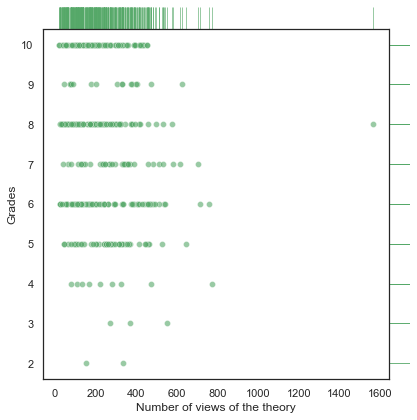

Courseid: 312.0


<Figure size 1440x1440 with 0 Axes>

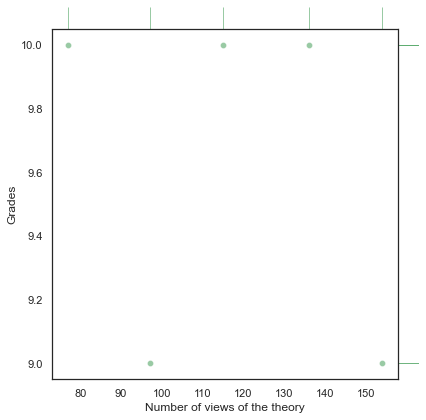

Courseid: 123.0


<Figure size 1440x1440 with 0 Axes>

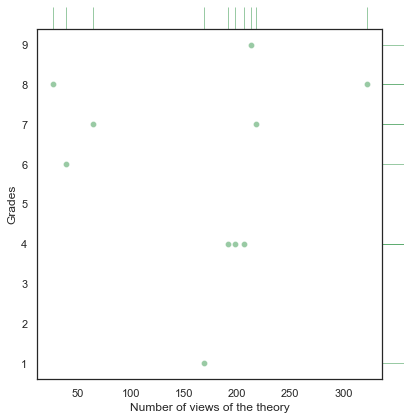

Courseid: 92.0


<Figure size 1440x1440 with 0 Axes>

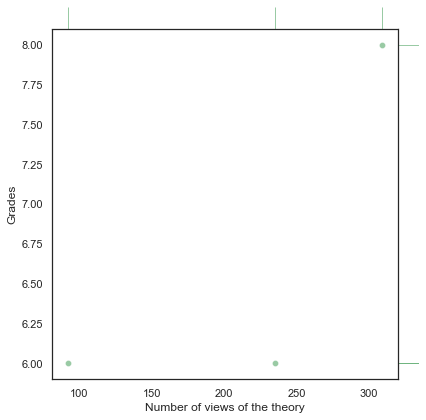

Courseid: 71.0


<Figure size 1440x1440 with 0 Axes>

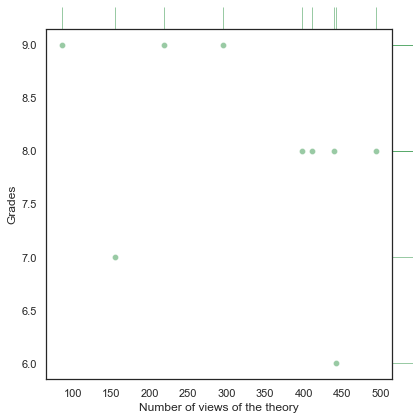

Courseid: 133.0


<Figure size 1440x1440 with 0 Axes>

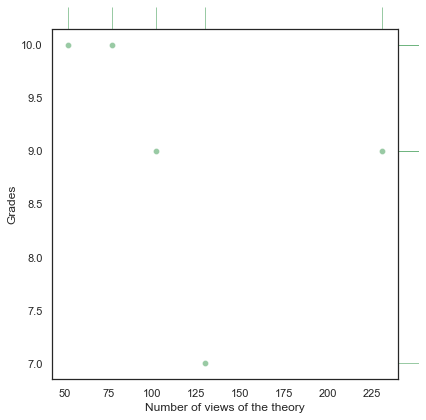

Courseid: 94.0


<Figure size 1440x1440 with 0 Axes>

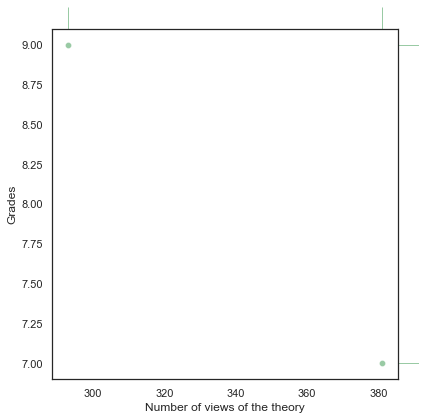

Courseid: 87.0


<Figure size 1440x1440 with 0 Axes>

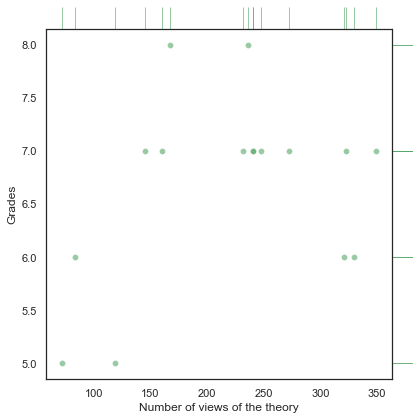

Courseid: 157.0


<Figure size 1440x1440 with 0 Axes>

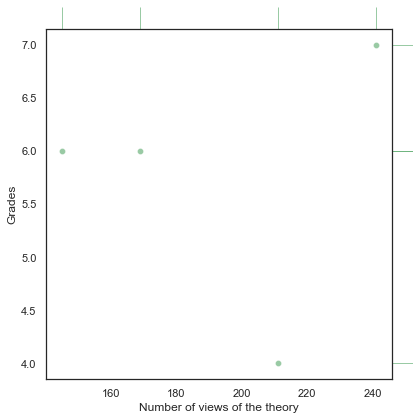

Courseid: 171.0


C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


<Figure size 1440x1440 with 0 Axes>

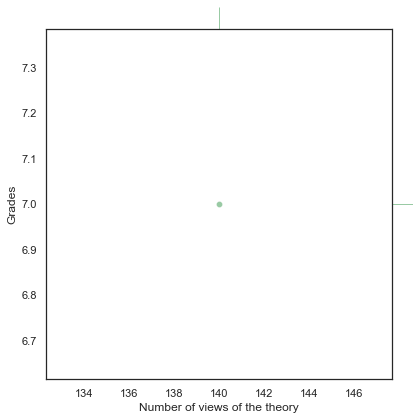

Courseid: 275.0


<Figure size 1440x1440 with 0 Axes>

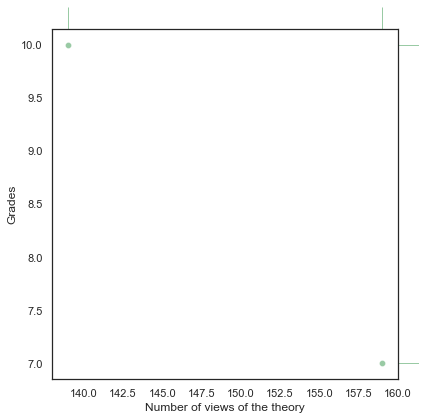

Courseid: 122.0


<Figure size 1440x1440 with 0 Axes>

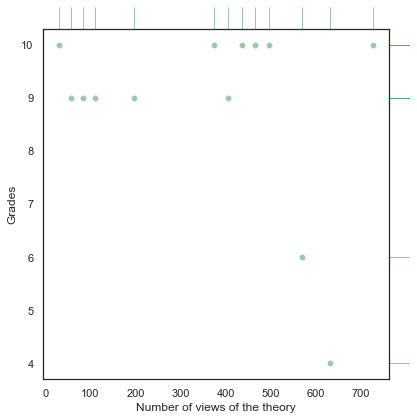

Courseid: 471.0


C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


<Figure size 1440x1440 with 0 Axes>

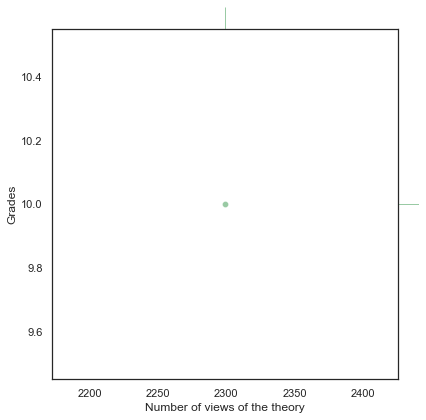

Courseid: 56.0


<Figure size 1440x1440 with 0 Axes>

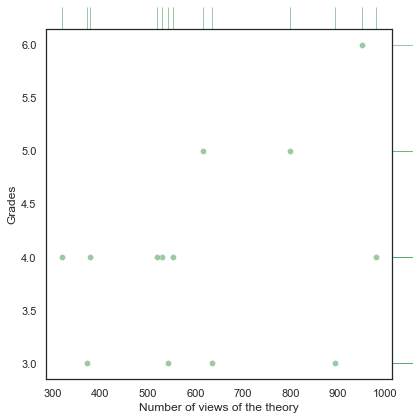

Courseid: 244.0


<Figure size 1440x1440 with 0 Axes>

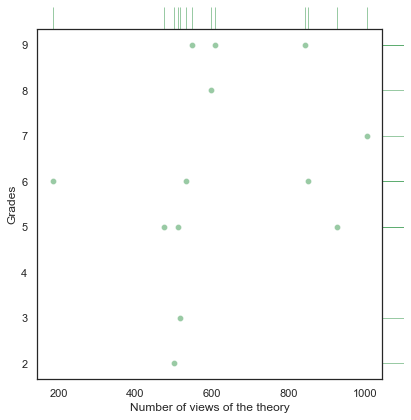

Courseid: 137.0


<Figure size 1440x1440 with 0 Axes>

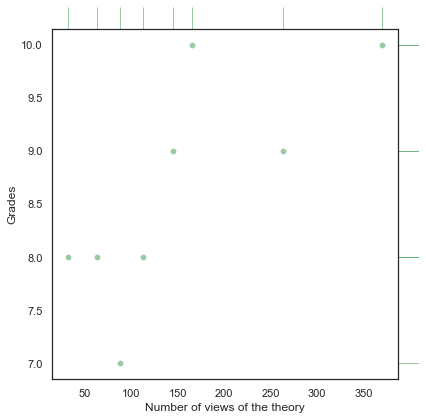

Courseid: 42.0


<Figure size 1440x1440 with 0 Axes>

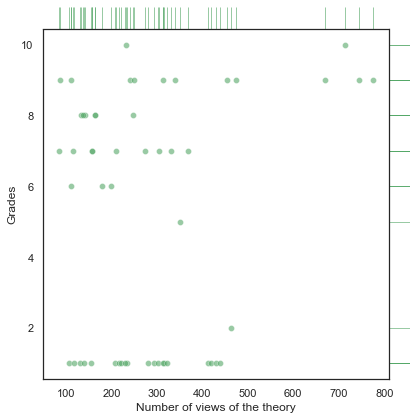

Courseid: 228.0


C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


<Figure size 1440x1440 with 0 Axes>

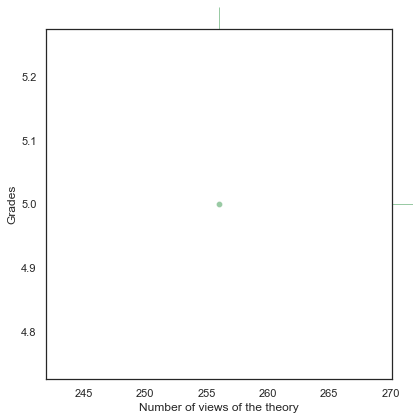

Courseid: 153.0


<Figure size 1440x1440 with 0 Axes>

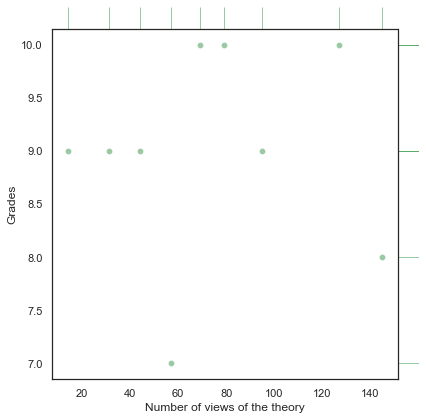

Courseid: 160.0


<Figure size 1440x1440 with 0 Axes>

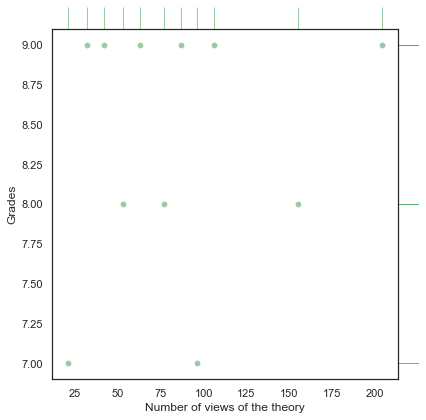

Courseid: 163.0


<Figure size 1440x1440 with 0 Axes>

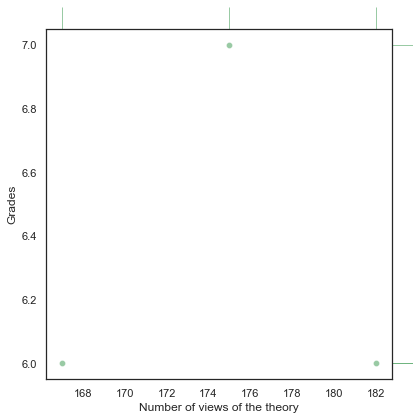

Courseid: 168.0


<Figure size 1440x1440 with 0 Axes>

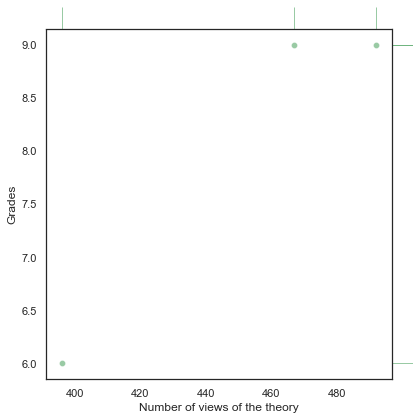

Courseid: 183.0


<Figure size 1440x1440 with 0 Axes>

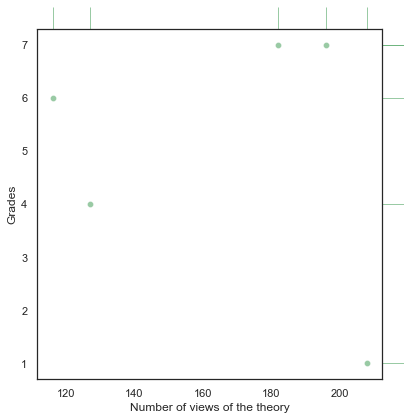

Courseid: 216.0


<Figure size 1440x1440 with 0 Axes>

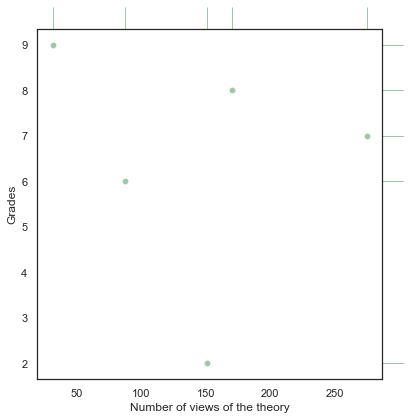

Courseid: 70.0


C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


<Figure size 1440x1440 with 0 Axes>

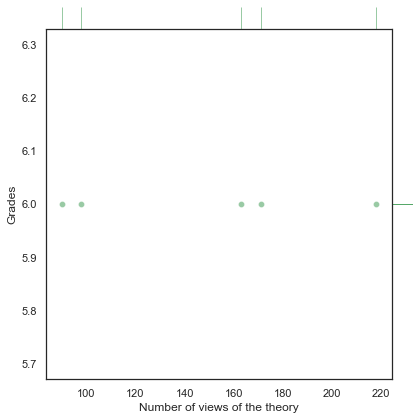

Courseid: 74.0


<Figure size 1440x1440 with 0 Axes>

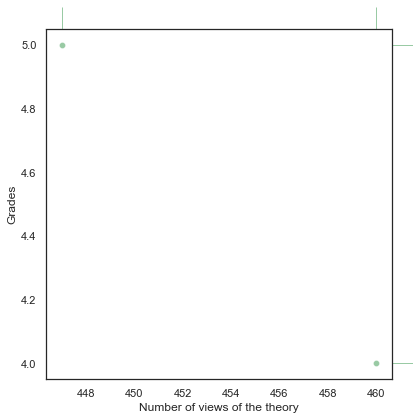

Courseid: 2250.0


<Figure size 1440x1440 with 0 Axes>

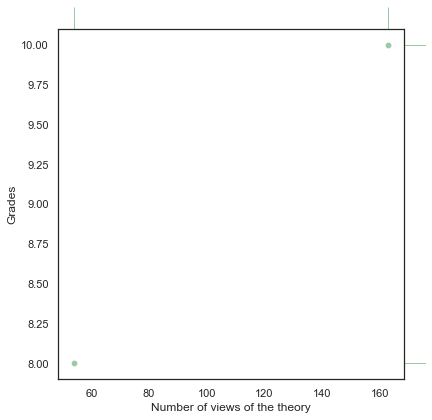

Courseid: 4278.0


<Figure size 1440x1440 with 0 Axes>

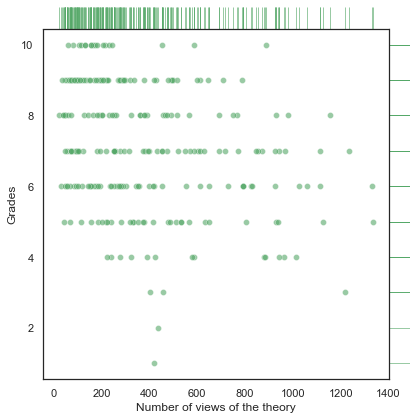

Courseid: 50.0


<Figure size 1440x1440 with 0 Axes>

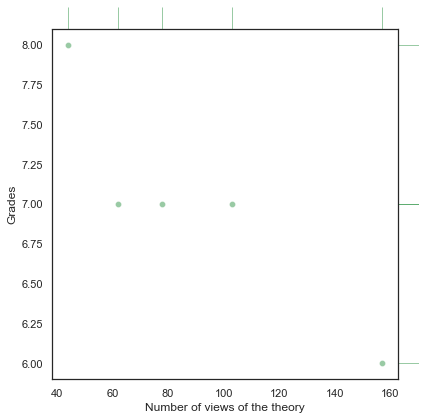

Courseid: 336.0


<Figure size 1440x1440 with 0 Axes>

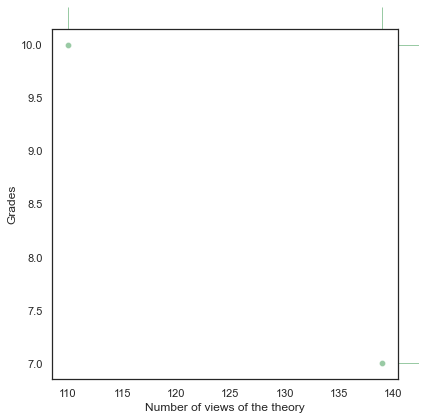

Courseid: 4097.0


<Figure size 1440x1440 with 0 Axes>

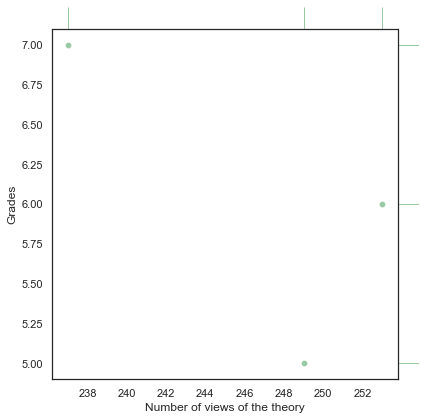

Courseid: 296.0


<Figure size 1440x1440 with 0 Axes>

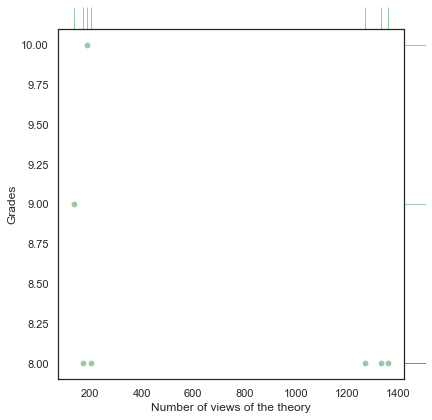

Courseid: 2263.0


<Figure size 1440x1440 with 0 Axes>

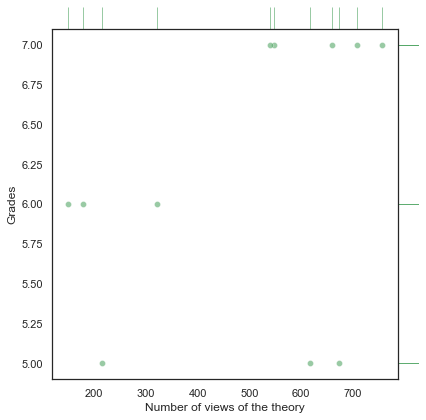

Courseid: 4065.0


<Figure size 1440x1440 with 0 Axes>

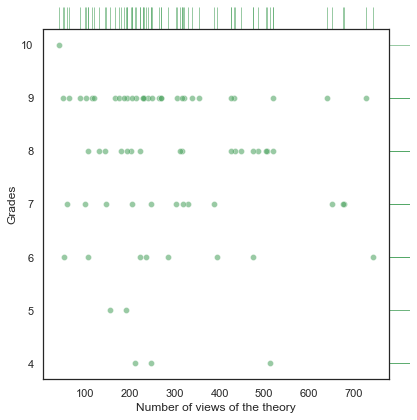

Courseid: 4280.0


<Figure size 1440x1440 with 0 Axes>

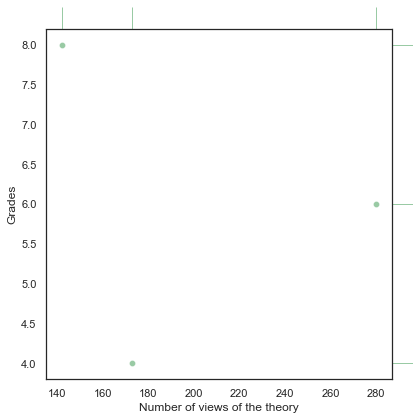

Courseid: 44.0


C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


<Figure size 1440x1440 with 0 Axes>

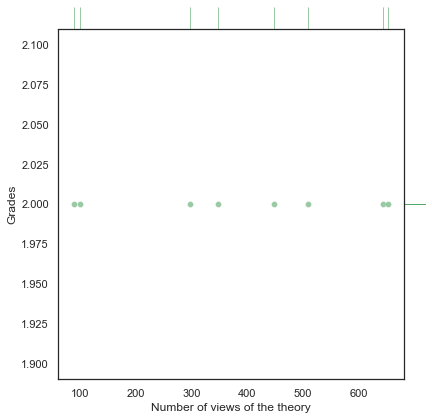

Courseid: 83.0


<Figure size 1440x1440 with 0 Axes>

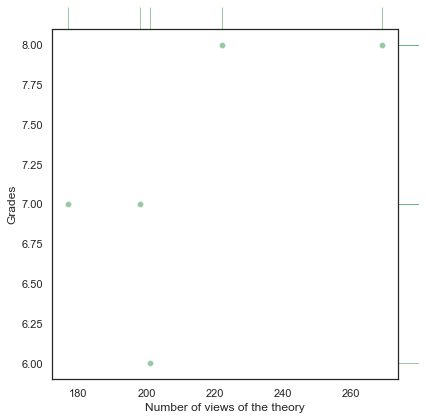

Courseid: 246.0


<Figure size 1440x1440 with 0 Axes>

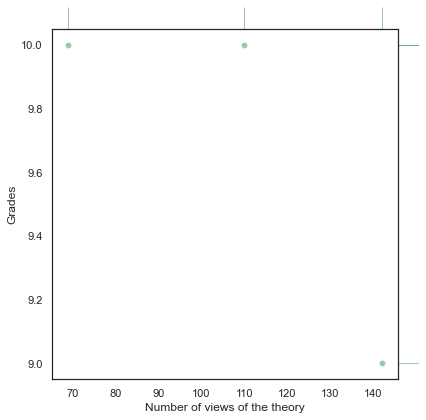

Courseid: 2934.0


C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


<Figure size 1440x1440 with 0 Axes>

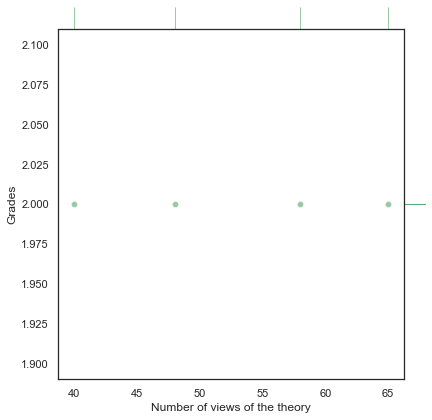

Courseid: 324.0


<Figure size 1440x1440 with 0 Axes>

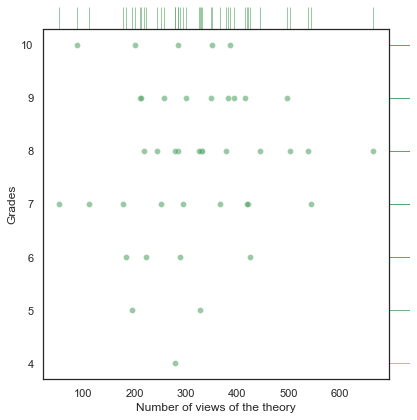

Courseid: 10.0


<Figure size 1440x1440 with 0 Axes>

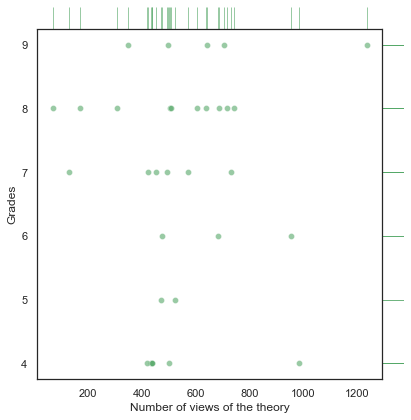

Courseid: 358.0


<Figure size 1440x1440 with 0 Axes>

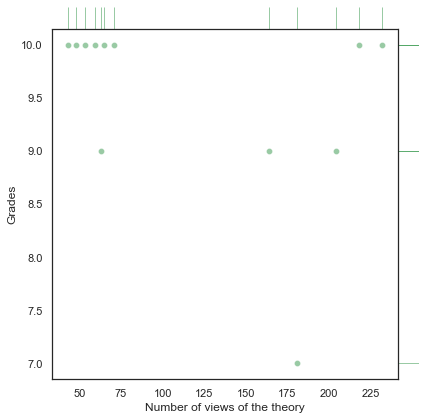

Courseid: 253.0


<Figure size 1440x1440 with 0 Axes>

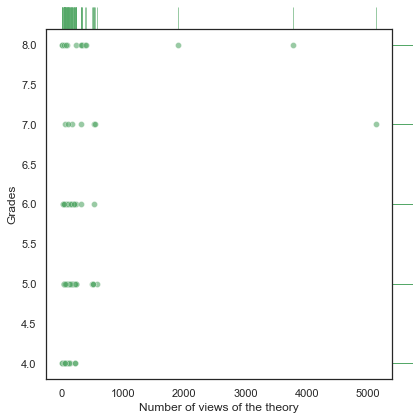

Courseid: 18.0


<Figure size 1440x1440 with 0 Axes>

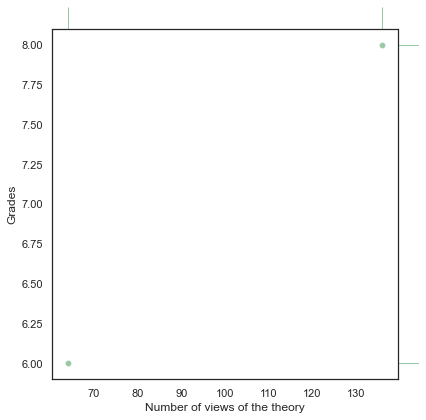

Courseid: 43.0


C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\37529\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


<Figure size 1440x1440 with 0 Axes>

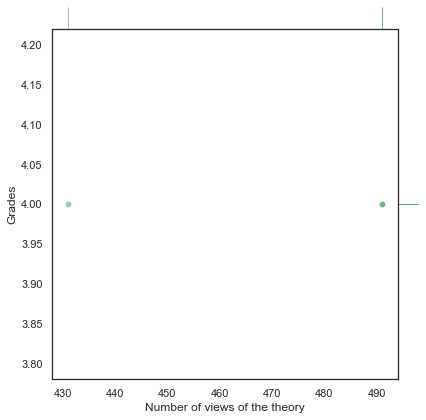

Courseid: 3785.0


<Figure size 1440x1440 with 0 Axes>

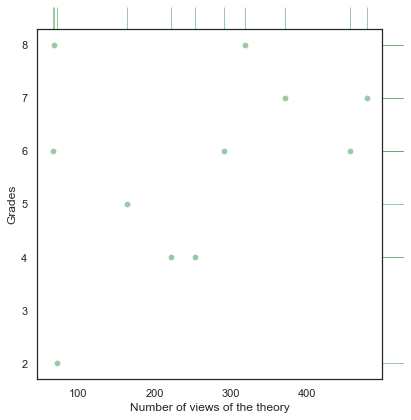

In [38]:
#графики распределения и подсчет корреляции в каждом курсе 
correllation_course={}
correllation_course['courseid']=coursid_c_o_t
correletion=[]
for i in coursid_c_o_t:
    course_osenka_teor_i=course_osenka_teor.loc[course_osenka_teor['courseid'] == i]
    cor=np.corrcoef(course_osenka_teor_i['Grades'], course_osenka_teor_i['Number of views of the theory'])[0,1]
    correletion.append(cor)
    print('Courseid:',i)
    GRAF(course_osenka_teor_i, i)
correllation_course['correlation']=correletion
df_corr = pd.DataFrame(correllation_course)


In [39]:
#создание df с курсами и корреляцией  
df_corr['correlation'] = df_corr['correlation']. fillna (11)
df_corr=df_corr.loc[df_corr['correlation'] != 11]
df_corr['correlation']= df_corr['correlation'].abs()
df_corr


,courseid,correlation
0,217.0,0.130169
1,312.0,0.290097
2,123.0,0.042473
3,92.0,0.761509
4,71.0,0.380826
5,133.0,0.385910
6,94.0,1.000000
7,87.0,0.339182
8,157.0,0.064968
10,275.0,1.000000


In [40]:
# среднее арифметическое коэффициента корреляциии для курсов
cor_course=df_corr['correlation'].mean()
cor_course

0.45137528405491534